# Global Power Plant Database
#### Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


### Key attributes of the database
The database includes the following indicators:

1. Plant name
2. Fuel type(s)
3. Generation capacity
4. Country
5. Ownership
6. Latitude/longitude of plant
7. Data source & URL
8. Data source year
9. Annual generation

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\internship\data\DSData-master\database_IND.csv")

In [3]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape  # as there is no duplicate values

(907, 27)

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [9]:
df.isnull().sum().sum()

10445

Here we can see that most of the data columns have missing values.In some columns, we have complete missing data.Latitude and longitude have 46 missing values.Other_fuel1, Other_fuel2, and Other_fuel3 have a large number of missing values.
commissioning_year_year has 380 null values, and oweners information is also missing.wepp_id is completely missing.Some of the important columns have missing values near about 500; we will decide later whether we need to drop or fill the columns.

Now we will remove those columns that are of no use and less relevant and also those columns that have the most null values, which create skewness in the data and lead to a loss in accuracy.

In [10]:
# dropping less relevant columns and columns with huge null values
df.drop(columns=['country', 'country_long','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh','year_of_capacity_data',
                    'wepp_id','geolocation_source','url','source','other_fuel1','other_fuel2','other_fuel3'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [12]:
df.columns   # After dropping columns we remain with these columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

#### Filling NAN values
Now we will fill Nan values by applying the filling Nan values method.

In [13]:
df['latitude'].fillna(value=df['latitude'].mean(),inplace=True)
df['longitude'].fillna(value=df['longitude'].mean(),inplace=True)

In [14]:
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace= True)
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace= True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)

In [15]:
# We will check wheather columns values filled or not
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [16]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,801.123775,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,801.123775,711.181225,737.205450,817.977250,751.644375
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,801.123775,711.181225,737.205450,817.977250,751.644375


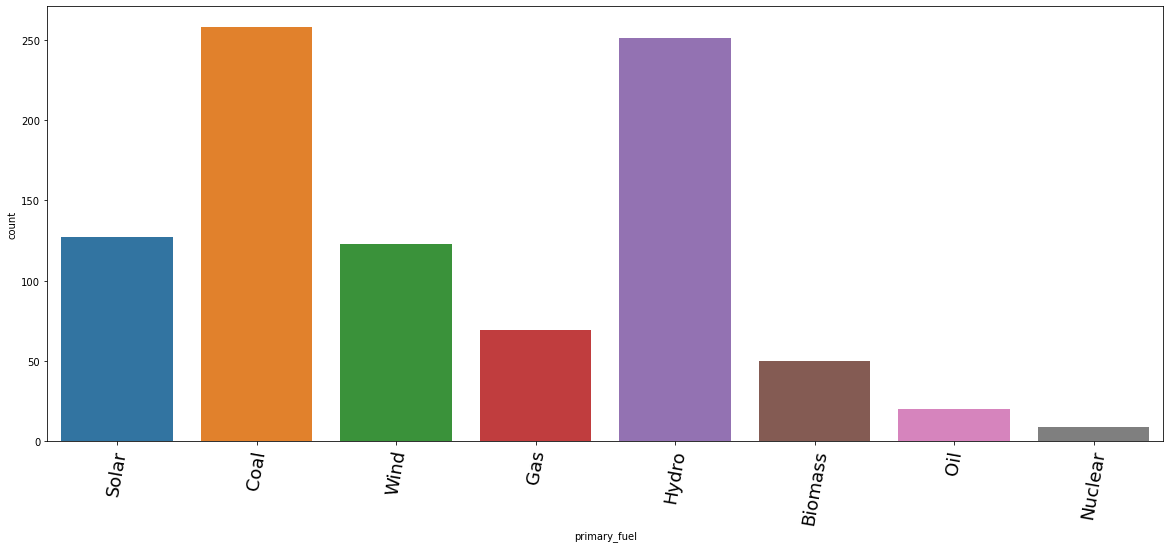

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(df['primary_fuel'])
locs, labels = plt.xticks(fontsize= 18)
plt.setp(labels, rotation=80)
plt.show()

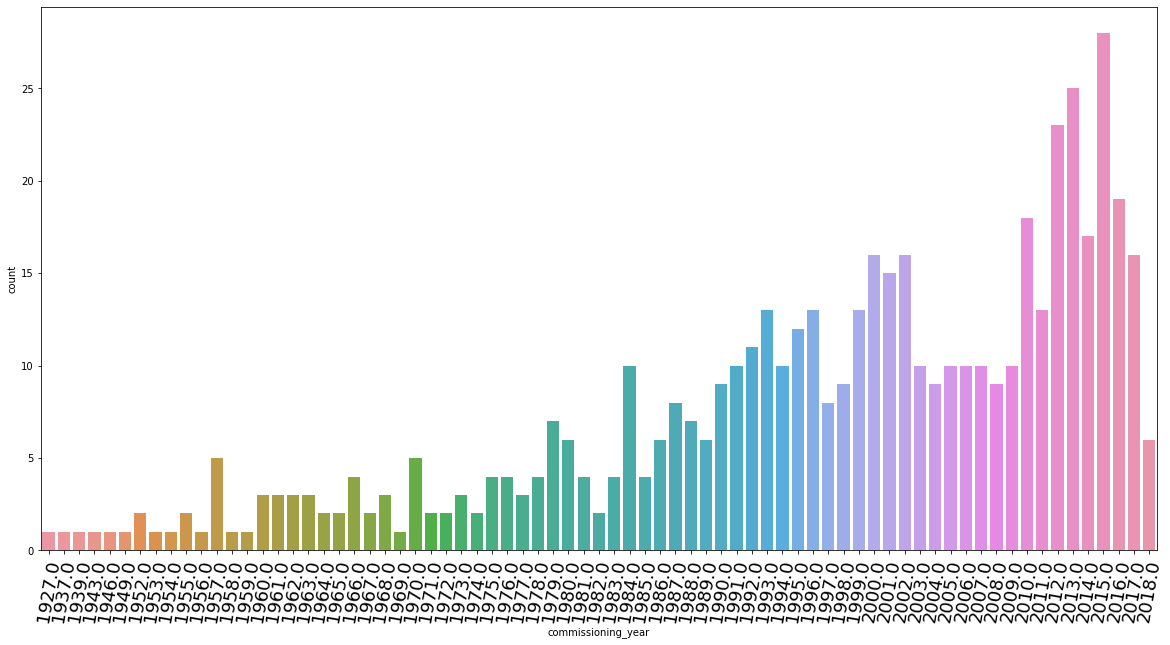

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(df['commissioning_year'])
locs, labels = plt.xticks(fontsize= 18)
plt.setp(labels, rotation=80)
plt.show()

As can be seen, India's first power plant began operations in 1927. Up until 1956, there were extremely few people. 3 to 5 new power plants were being built each year between 1957 and 1983. The amount rises to 1964, making a grand total of 10. The power sector continued to expand after 1964.
The most power plants were present in 2013; there were more than 25 in total.

In [19]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
generation_gwh_2014,907.0,1516.689956,2785.604307,0.0000,801.123775,801.123775,801.123775,28127.000
generation_gwh_2015,907.0,1510.071296,2984.994556,0.0000,711.181225,711.181225,711.181225,30539.000
generation_gwh_2016,907.0,1565.361383,3005.087210,0.0000,737.205450,737.205450,737.205450,30015.000
generation_gwh_2017,907.0,1657.121797,3046.862910,0.0000,817.977250,817.977250,817.977250,35116.000
generation_gwh_2018,907.0,1665.011030,3168.826750,0.0000,751.644375,751.644375,751.644375,35136.000


In [21]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.304087,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036362,0.124504,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.195882,0.036362,1.000000,0.115182,0.104649,0.121513,0.143459,0.151712,0.155063
commissioning_year,0.304087,0.124504,0.115182,1.000000,0.112889,0.147515,0.182283,0.195345,0.201070
generation_gwh_2014,0.793497,0.058594,0.104649,0.112889,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.121513,0.147515,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.047677,0.143459,0.182283,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.868338,0.057897,0.151712,0.195345,0.904075,0.940229,0.973909,1.000000,0.986685
generation_gwh_2018,0.884840,0.055216,0.155063,0.201070,0.895143,0.933161,0.964988,0.986685,1.000000


As we saw in the description of data columns, name,owner, gppd_idnr, and commissioning_year are less work in data, and they will also lead to skewness in data. In the future, we will drop these columns for better accuracy in data.

In [22]:
df.drop(columns=['name','owner','gppd_idnr','commissioning_year'],inplace=True) # beacuse they have less do with data.

In [23]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<Figure size 576x576 with 0 Axes>

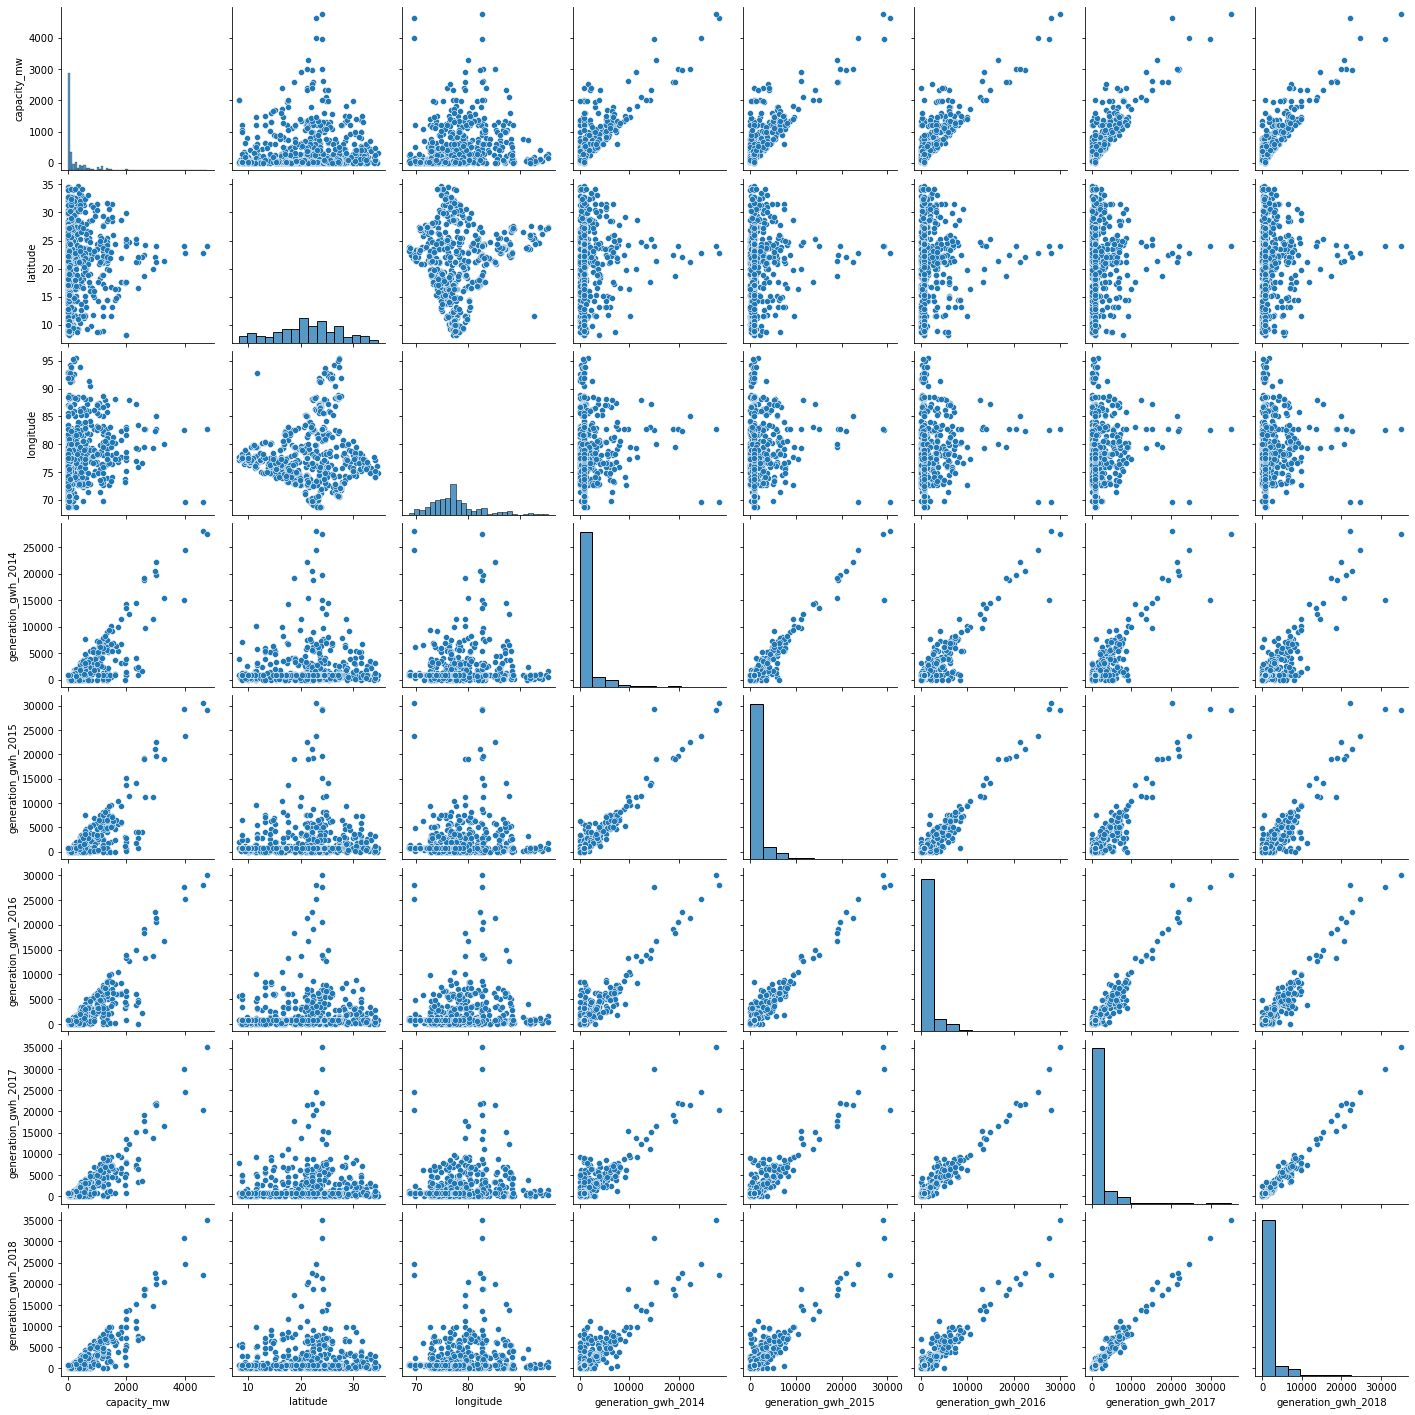

In [24]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df)
plt.show()

<AxesSubplot:>

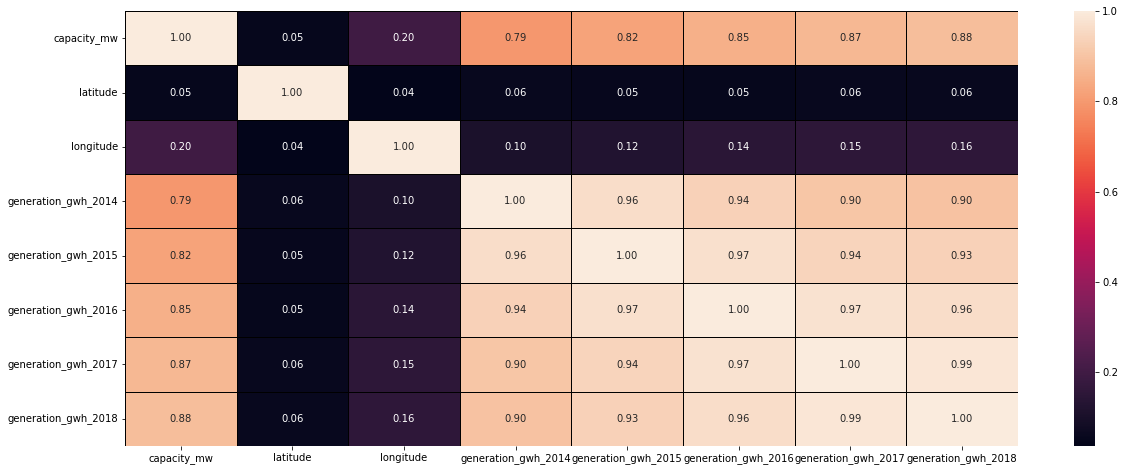

In [25]:
# now making heat map
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

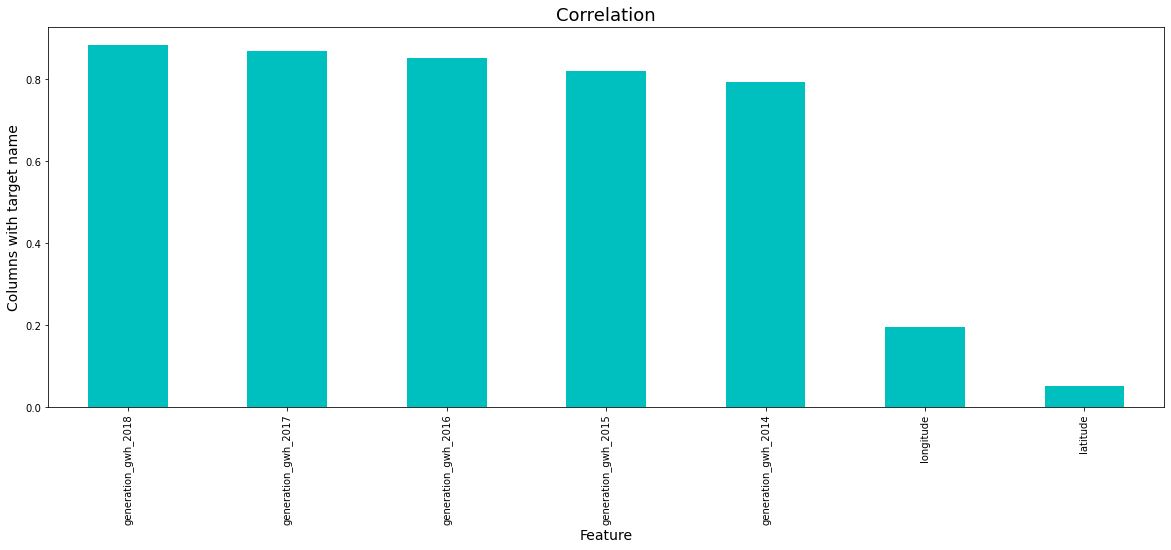

In [26]:
plt.figure(figsize=(20,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

## Primary_fuel

WE will split data into features and labels.

In [27]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
features=df.drop('primary_fuel',axis=1)
label=df['primary_fuel']
X=features
y=label
LE=LabelEncoder()
df["primary_fuel"]=LE.fit_transform(df["primary_fuel"])

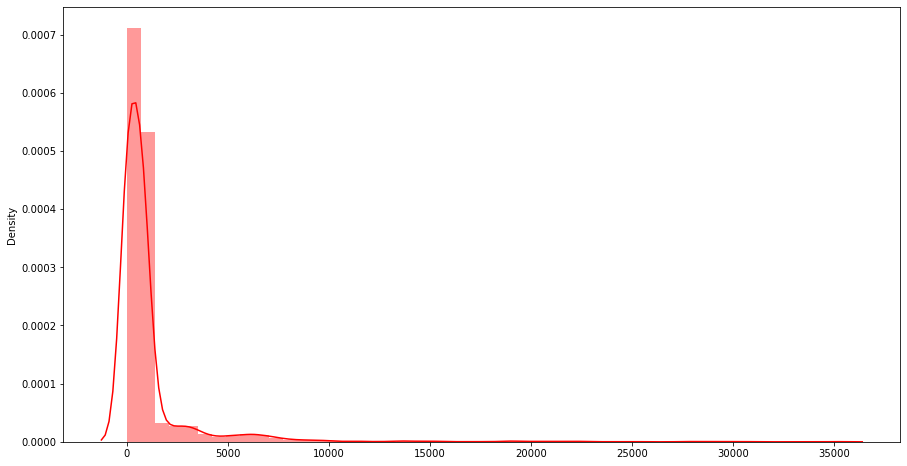

In [28]:
# Now we will plot distplot for other 
plt.figure(figsize=(15,8))
sns.distplot(X,color='red')
plt.show()

<AxesSubplot:>

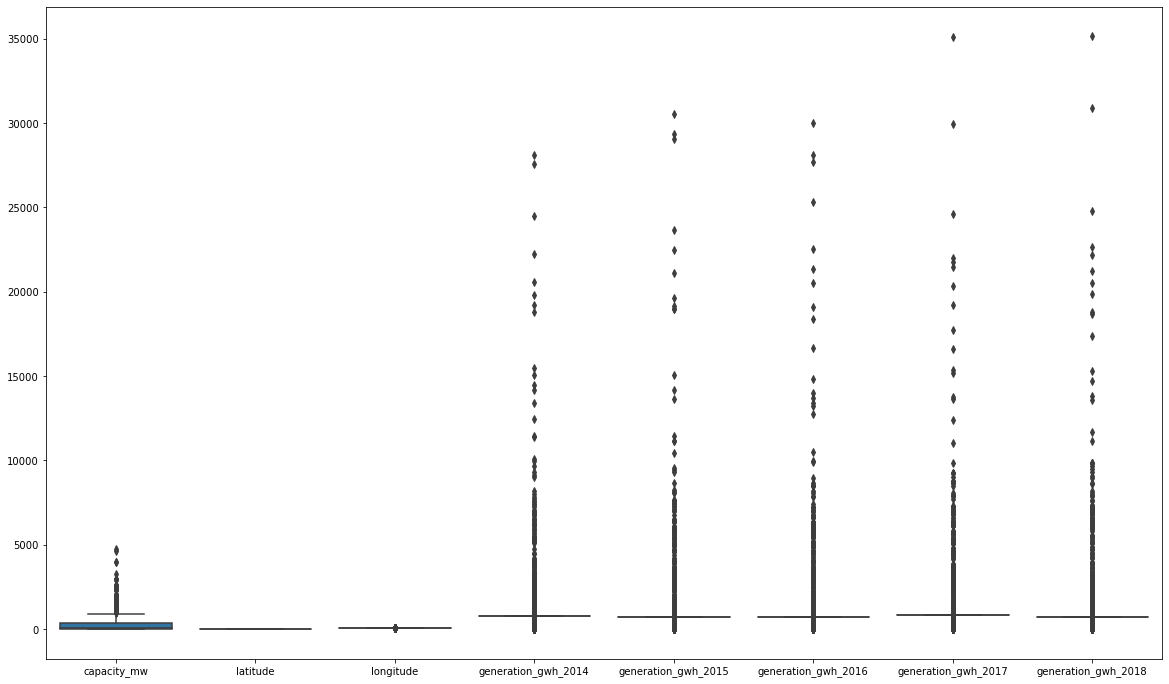

In [29]:
plt.figure(figsize=(20,12))
sns.boxplot(data = X)

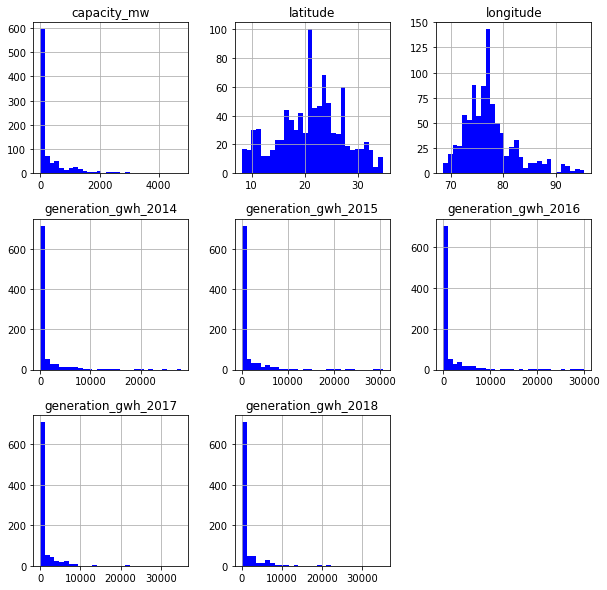

In [30]:
X.hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [31]:
# Now we will do preprocessing of data to remove skewness from it
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer()
scaled=scaler.fit_transform(X)

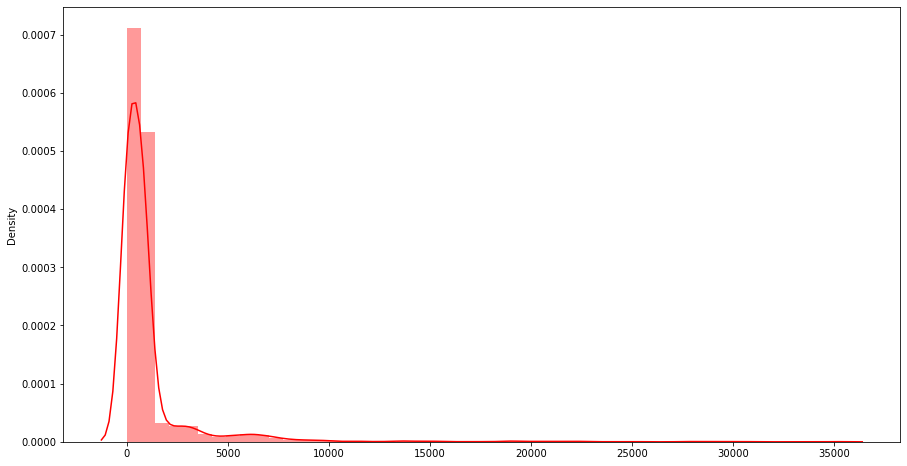

In [32]:
# Visualizing data after scaling
plt.figure(figsize=(15,8))
sns.distplot(X,color='red')
plt.show()

Removing of outliers

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(X))
threshold=3
X1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',((X.shape[0]-X1.shape[0])/X.shape[0])*100)

percentage of loss of data by zscore is : 4.5203969128996695


### VIF


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled, i) for i in range (scaled.shape[1])]
vif["Features"] = X.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,1.316650,capacity_mw
1,1.019520,latitude
2,1.135901,longitude
3,4.045830,generation_gwh_2014
4,6.833699,generation_gwh_2015
5,11.059023,generation_gwh_2016
6,9.920156,generation_gwh_2017
7,9.646954,generation_gwh_2018


The vif of generation_gwh_2016 is more than 10 so we will drop this column.

In [35]:
X.drop('generation_gwh_2016',axis=1,inplace=True)

### Applying ML
######  First we will do for primary fuel.

In [90]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,cross_val_score


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,auc,r2_score,roc_auc_score,roc_curve,confusion_matrix,mean_absolute_error,mean_squared_error

In [37]:
# we will do over sampling of data
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [38]:
# define dataset
X, y = make_classification(n_samples=220, weights=[0.193], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 177, 0: 43})
Counter({1: 177, 0: 177})


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30,stratify=y)

In [102]:
# For Logestic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100)
print("R2 score",r2_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 96.36363636363636
Training Accuracy 98.18181818181819
R2 score 77.27272727272727
[[ 9  2]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.96      1.00      0.98        44

    accuracy                           0.96        55
   macro avg       0.98      0.91      0.94        55
weighted avg       0.97      0.96      0.96        55



In [103]:
cr_1=cross_val_score(lr,X,y,cv=5, scoring='r2')
print("Cross Validation Score of LR model :",cr_1.mean()*100)

Cross Validation Score of LR model : 65.42857142857143


In [104]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predlr)*100)
print('Mean Squared Error:', mean_squared_error(y_test,predlr)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predlr))*100)

Model Evaluation:
Mean Absolute Error: 3.6363636363636362
Mean Squared Error: 3.6363636363636362
Root Mean Square Error: 19.069251784911845


In [105]:
# For KNN
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_KNN)*100)
print("R2 score",r2_score(y_test,predKNN)*100)
cr_2=cross_val_score(KNN,X,y,cv=5,scoring='r2')
print("Cross Validation Score of KNN model :",cr_2.mean()*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

Test Accuracy 89.0909090909091
Training Accuracy 95.75757575757575
R2 score 31.818181818181813
Cross Validation Score of KNN model : 30.857142857142843
[[ 7  4]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.91      0.95      0.93        44

    accuracy                           0.89        55
   macro avg       0.85      0.80      0.82        55
weighted avg       0.89      0.89      0.89        55



In [106]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predKNN)*100)
print('Mean Squared Error:', mean_squared_error(y_test,predKNN)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predKNN))*100)

Model Evaluation:
Mean Absolute Error: 10.909090909090908
Mean Squared Error: 10.909090909090908
Root Mean Square Error: 33.028912953790815


In [107]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dt)*100)
print("R2 score",r2_score(y_test,preddt)*100)
cr_3=cross_val_score(dt,X,y,cv=5,scoring='r2')
print("Cross Validation Score of Decision Tree model :",cr_3.mean()*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 94.54545454545455
Training Accuracy 100.0
R2 score 65.9090909090909
Cross Validation Score of Decision Tree model : 59.317460317460316
[[10  1]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.98      0.95      0.97        44

    accuracy                           0.95        55
   macro avg       0.91      0.93      0.92        55
weighted avg       0.95      0.95      0.95        55



In [108]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test,preddt)*100)
print('Mean Squared Error:', mean_squared_error(y_test,preddt)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,preddt))*100)

Model Evaluation:
Mean Absolute Error: 5.454545454545454
Mean Squared Error: 5.454545454545454
Root Mean Square Error: 23.354968324845686


In [109]:
# Raandom Forest
rdf =RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_rdf)*100)
print("R2 score",r2_score(y_test,predrdf)*100)
cr_4=cross_val_score(rdf,X,y,cv=5,scoring='r2')
print("Cross Validation Score of RDF model :",cr_4.mean()*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 96.36363636363636
Training Accuracy 100.0
R2 score 77.27272727272727
Cross Validation Score of RDF model : 71.27777777777776
[[10  1]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.98      0.98      0.98        44

    accuracy                           0.96        55
   macro avg       0.94      0.94      0.94        55
weighted avg       0.96      0.96      0.96        55



In [110]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predrdf)*100)
print('Mean Squared Error:', mean_squared_error(y_test,predrdf)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predrdf))*100)

Model Evaluation:
Mean Absolute Error: 3.6363636363636362
Mean Squared Error: 3.6363636363636362
Root Mean Square Error: 19.069251784911845


In [111]:
# SVC
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,pred_svc)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100)
print("R2 score",r2_score(y_test,pred_svc)*100)
cr_5=cross_val_score(svr,X,y,cv=5,scoring='r2')
print("Cross Validation Score of SVC model :",cr_5.mean()*100)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Test Accuracy 96.36363636363636
Training Accuracy 98.7878787878788
R2 score 77.27272727272727
Cross Validation Score of SVC model : 55.77436833200874
[[ 9  2]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.96      1.00      0.98        44

    accuracy                           0.96        55
   macro avg       0.98      0.91      0.94        55
weighted avg       0.97      0.96      0.96        55



In [112]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svc)*100)
print('Mean Squared Error:', mean_squared_error(y_test,pred_svc)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_svc))*100)

Model Evaluation:
Mean Absolute Error: 3.6363636363636362
Mean Squared Error: 3.6363636363636362
Root Mean Square Error: 19.069251784911845


In [113]:
# GBT
gbt=GradientBoostingClassifier()
gbt.fit(X_train,y_train)
predgbt=gbt.predict(X_test)
pred_train_gbt=gbt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predgbt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_gbt)*100)
print("R2 score",r2_score(y_test,predgbt)*100)
cr_8=cross_val_score(gbt,X,y,cv=8,scoring='r2')
print("Cross Validation Score of GBT model :",cr_8.mean()*100)
print(confusion_matrix(y_test,predgbt))
print(classification_report(y_test,predgbt))

Test Accuracy 94.54545454545455
Training Accuracy 100.0
R2 score 65.9090909090909
Cross Validation Score of GBT model : 73.66106719367589
[[10  1]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.98      0.95      0.97        44

    accuracy                           0.95        55
   macro avg       0.91      0.93      0.92        55
weighted avg       0.95      0.95      0.95        55



In [114]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predgbt)*100)
print('Mean Squared Error:', mean_squared_error(y_test,predgbt)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predgbt))*100)

Model Evaluation:
Mean Absolute Error: 5.454545454545454
Mean Squared Error: 5.454545454545454
Root Mean Square Error: 23.354968324845686


## Hyperparameter tunning

In [116]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
parameters={"max_features":['sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['gini','entrophy'],
    'n_estimators':[100,200,300,400,500]}

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:

#printing the best parameters found by GridsearchCV

#RandomForestClassifier()
print(GCV.best_estimator_)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=200)


In [117]:
#fitting the dataset in model:
print(type(GCV))
#printing the best parameters found by GridsearchCV
print(GCV.best_params_)

<class 'sklearn.model_selection._search.GridSearchCV'>
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [119]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)*100

96.36363636363636

#  Now for capacity_mw

In [88]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,cross_val_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,auc,r2_score,roc_auc_score,roc_curve,confusion_matrix,mean_absolute_error,mean_squared_error

In [59]:
features=df.drop('capacity_mw',axis=1)
label=df['capacity_mw']
X1=features
y1=label
LE=LabelEncoder()
df["capacity_mw"]=LE.fit_transform(df["capacity_mw"])

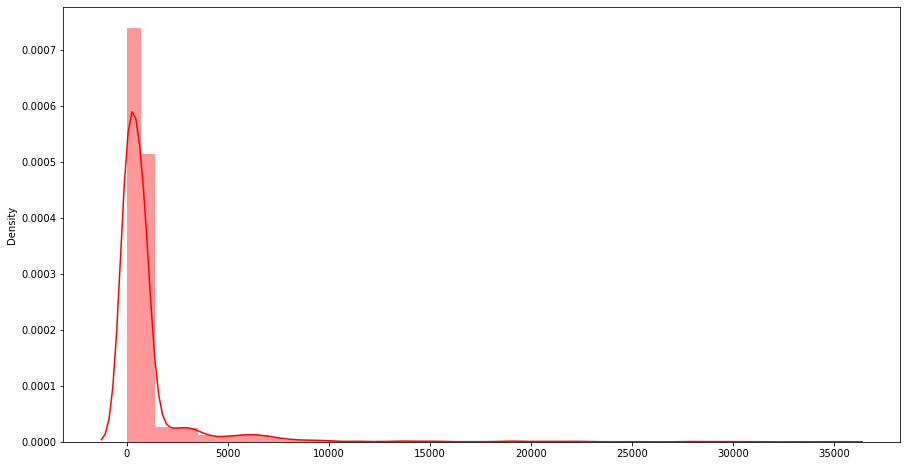

In [60]:
# Now we will plot distplot for other 
plt.figure(figsize=(15,8))
sns.distplot(X1,color='red')
plt.show()

In [61]:
X1.skew().sort_values()

latitude              -0.149698
primary_fuel           0.472251
longitude              1.141881
generation_gwh_2018    5.133226
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
dtype: float64

In [62]:
# Now we will do preprocessing of data to remove skewness from it
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer()
scaled_c=scaler.fit_transform(X1)

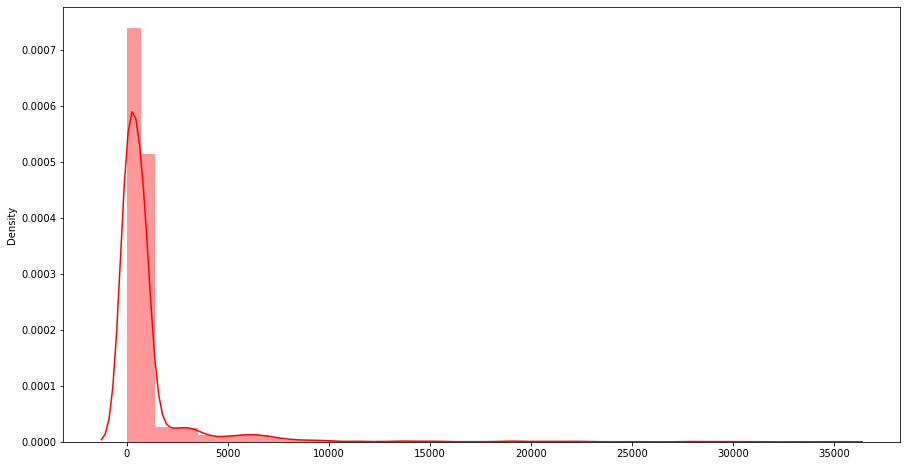

In [63]:
# Visualizing data after scaling
plt.figure(figsize=(15,8))
sns.distplot(X1,color='red')
plt.show()

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(X1))
threshold=3
X2=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',((X1.shape[0]-X2.shape[0])/X1.shape[0])*100)

percentage of loss of data by zscore is : 3.9691289966923926


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_c, i) for i in range (scaled_c.shape[1])]
vif["Features"] = X1.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,1.020329,latitude
1,1.150102,longitude
2,1.191438,primary_fuel
3,4.040142,generation_gwh_2014
4,6.819038,generation_gwh_2015
5,11.064083,generation_gwh_2016
6,9.912401,generation_gwh_2017
7,9.630643,generation_gwh_2018


In [66]:
# dropping heneration_gwh_2016 as it is more than 10
X1.drop('generation_gwh_2016',axis=1,inplace=True)

In [67]:
# define dataset
X1, y1 = make_classification(n_samples=220, weights=[0.193], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X1, y1)
# summarize class distribution
print(Counter(y_over))

Counter({1: 177, 0: 43})
Counter({1: 177, 0: 177})


In [68]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X1, y1, test_size=0.25, random_state=30)

In [69]:
# For Logestic regression
lr=LogisticRegression()
lr.fit(X_train_a,y_train_a)
predlr=lr.predict(X_test_a)
pred_train_lr=lr.predict(X_train_a)
print("Test Accuracy",accuracy_score(y_test_a,predlr)*100)
print("Training Accuracy",accuracy_score(y_train_a,pred_train_lr)*100)
print("R2 score",r2_score(y_test_a,predlr)*100)
Cr_1=cross_val_score(lr,X1,y1,cv=5, scoring='r2')
print("Cross Validation Score of LR model :",Cr_1.mean()*100)

Test Accuracy 92.72727272727272
Training Accuracy 93.93939393939394
R2 score 54.54545454545454
Cross Validation Score of LR model : 38.97619047619047


In [70]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test_a,predlr)*100)
print('Mean Squared Error:', mean_squared_error(y_test_a,predlr)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_a,predlr))*100)

Model Evaluation:
Mean Absolute Error: 7.2727272727272725
Mean Squared Error: 7.2727272727272725
Root Mean Square Error: 26.967994498529684


In [71]:
# For KNN
KNN=KNeighborsRegressor()
KNN.fit(X_train_a,y_train_a)
predKNN=KNN.predict(X_test_a)
pred_train_KNN=KNN.predict(X_train_a)

print("R2 score",r2_score(y_test_a,predKNN)*100)
cr_2=cross_val_score(KNN,X1,y1,cv=5,scoring='r2')
print("Cross Validation Score of KNN model :",cr_2.mean()*100)

R2 score 48.63636363636362
Cross Validation Score of KNN model : 30.80525805661628


In [72]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test_a,predKNN)*100)
print('Mean Squared Error:', mean_squared_error(y_test_a,predKNN)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_a,predKNN))*100)

Model Evaluation:
Mean Absolute Error: 17.818181818181817
Mean Squared Error: 8.218181818181819
Root Mean Square Error: 28.66737137963964


In [73]:
# For Decision Tree
dt=DecisionTreeRegressor()
dt.fit(X_train_a,y_train_a)
preddt=dt.predict(X_test_a)
pred_train_dt=dt.predict(X_train_a)
print("Test Accuracy",accuracy_score(y_test_a,preddt)*100)
print("Training Accuracy",accuracy_score(y_train_a,pred_train_dt)*100)
print("R2 score",r2_score(y_test_a,preddt)*100)
cr_3=cross_val_score(dt,X1,y1,cv=5,scoring='r2')
print("Cross Validation Score of Decision Tree model :",cr_3.mean()*100)

Test Accuracy 92.72727272727272
Training Accuracy 100.0
R2 score 54.54545454545454
Cross Validation Score of Decision Tree model : 41.822717064440326


In [76]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test_a,preddt)*100)
print('Mean Squared Error:', mean_squared_error(y_test_a,preddt)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_a,preddt))*100)

Model Evaluation:
Mean Absolute Error: 7.2727272727272725
Mean Squared Error: 7.2727272727272725
Root Mean Square Error: 26.967994498529684


In [77]:
# Raandom Forest
rdf =RandomForestRegressor()
rdf.fit(X_train_a,y_train_a)
predrdf=rdf.predict(X_test_a)
pred_train_rdf=rdf.predict(X_train_a)
print("R2 score",r2_score(y_test_a,predrdf)*100)
cr_4=cross_val_score(rdf,X1,y1,cv=5,scoring='r2')
print("Cross Validation Score of RDF model :",cr_4.mean()*100)

R2 score 66.66136363636362
Cross Validation Score of RDF model : 62.861700014377284


In [78]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test_a,predrdf)*100)
print('Mean Squared Error:', mean_squared_error(y_test_a,predrdf)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_a,predrdf))*100)

Model Evaluation:
Mean Absolute Error: 10.32727272727273
Mean Squared Error: 5.334181818181819
Root Mean Square Error: 23.09584771811119


In [79]:
# SVR
svr=SVR()
svr.fit(X_train_a,y_train_a)
pred_svr=svr.predict(X_test_a)
pred_train_svr=svr.predict(X_train_a)
print("R2 score",r2_score(y_test_a,pred_svr)*100)
cr_5=cross_val_score(svr,X1,y1,cv=5,scoring='r2')
print("Cross Validation Score of SVR model :",cr_5.mean()*100)

R2 score 59.60703550917496
Cross Validation Score of SVR model : 48.05264076414968


In [80]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test_a,pred_svr)*100)
print('Mean Squared Error:', mean_squared_error(y_test_a,pred_svr)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_a,pred_svr))*100)

Model Evaluation:
Mean Absolute Error: 20.2108163956738
Mean Squared Error: 6.462874318532004
Root Mean Square Error: 25.42218385295017


In [81]:
# Ridge
rd=Ridge()
rd.fit(X_train_a,y_train_a)
predrd=rd.predict(X_test_a)
pred_train_rd=rd.predict(X_train_a)
print("R2 score",r2_score(y_test_a,predrd)*100)
cr_7=cross_val_score(rd,X1,y1,cv=8,scoring='r2')
print("Cross Validation Score of Ridge model :",cr_7.mean()*100)

R2 score 55.6093284739137
Cross Validation Score of Ridge model : 49.98090878499944


In [82]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test_a,predrd)*100)
print('Mean Squared Error:', mean_squared_error(y_test_a,predrd)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_a,predrd))*100)

Model Evaluation:
Mean Absolute Error: 20.518125694536018
Mean Squared Error: 7.102507444173807
Root Mean Square Error: 26.650529908753796


In [83]:
# GBT
gbt=GradientBoostingRegressor()
gbt.fit(X_train_a,y_train_a)
predgbt=gbt.predict(X_test_a)
pred_train_gbt=gbt.predict(X_train_a)
print("R2 score",r2_score(y_test_a,predgbt)*100)
cr_8=cross_val_score(gbt,X1,y1,cv=8,scoring='r2')
print("Cross Validation Score of Ridge model :",cr_8.mean()*100)

R2 score 64.27738599068702
Cross Validation Score of Ridge model : 56.857615788831026


In [84]:
print('Model Evaluation:')

print('Mean Absolute Error:',mean_absolute_error(y_test_a,predgbt)*100)
print('Mean Squared Error:', mean_squared_error(y_test_a,predgbt)*100)
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_a,predgbt))*100)

Model Evaluation:
Mean Absolute Error: 10.689827850239201
Mean Squared Error: 5.715618241490077
Root Mean Square Error: 23.907359204834975


### Hyperparameter tunning

In [85]:
from sklearn.model_selection import GridSearchCV
RandomForestRegressor()
parameters={"max_features":['auto','sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['mse', 'absolute_error','squared_error','poisson'],
    'n_estimators':[100,200,300,400,500]}

GCV=GridSearchCV(estimator=RandomForestRegressor(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train_a,y_train_a)
#fitting the dataset in model:

#printing the best parameters found by GridsearchCV

#RandomForestClassifier()
print(GCV.best_estimator_)

RandomForestRegressor(criterion='mse', max_depth=5)


In [86]:
#fitting the dataset in model:
print(type(GCV))
#printing the best parameters found by GridsearchCV
print(GCV.best_params_)

<class 'sklearn.model_selection._search.GridSearchCV'>
{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [87]:
#predicting the best accuracy parameters
#checking the first accuracy:
rf=RandomForestRegressor(criterion='mse', max_features='auto', max_depth=5, n_estimators=100)
rf.fit(X_train_a, y_train_a)
rf.score(X_train_a,y_train_a)
rf_pred=rf.predict(X_test_a)

rf_score= r2_score(y_test_a, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,X1,y1, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 69.42491726696007
Cross val Score : 65.27226369559025


In [120]:
import pickle
filename='Evaluation_Project-Global_Power_Plant_Database_regression.pkl'
pickle.dump(rf,open(filename,'wb'))

Finish